<a href="https://colab.research.google.com/github/Priangshu-18/Handwritten-Digit-Prediction-with-NN/blob/main/Handwritten_Digit_Prediction_with_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
type(X_train)

numpy.ndarray

In [6]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data = 60,000 images

Test Data = 10,000 images

In [7]:
# printing the image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [9]:
print(X_train[10].shape)

(28, 28)


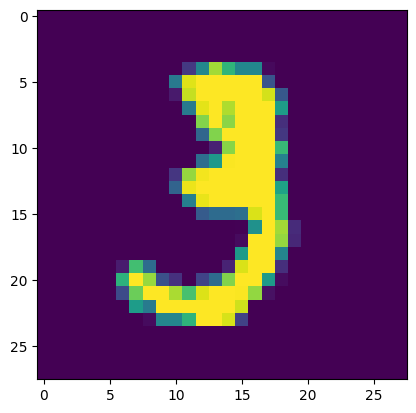

3


In [12]:
# printing the image
plt.imshow(X_train[10])
plt.show()

# printing the corresponding label
print(Y_train[10])

In [13]:
# unique values in Y-train
print(np.unique(Y_train))

# unique values in Y-test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [14]:
# Scaling the values (0 - 1)
X_train  = X_train/255
X_test = X_test/255

In [16]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [19]:
# setting up the labels

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# Compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Training the neural network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8430 - loss: 0.5284
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9538 - loss: 0.1538
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9675 - loss: 0.1087
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9755 - loss: 0.0839
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9798 - loss: 0.0682
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9834 - loss: 0.0569
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9857 - loss: 0.0477
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9885 - loss: 0.0401
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9896 - loss: 0.0343
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9911 - loss: 0.0305


Training data accuracy is = 99.11%

**Accuracy on test data**

In [22]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9643 - loss: 0.1263


In [23]:
print(accuracy)

0.9667999744415283


Test Data accuracy = 96.67%

In [24]:
print(X_test.shape)

(10000, 28, 28)


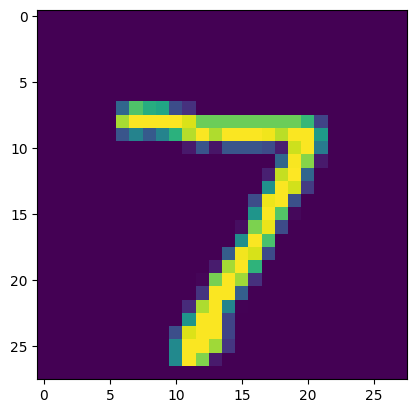

In [25]:
plt.imshow(X_test[0])
plt.show()

In [26]:
print(Y_test[0])

7


In [27]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [28]:
print(Y_pred.shape)

(10000, 10)


In [29]:
print(Y_pred[0])

[1.06948855e-05 2.26306985e-03 8.03705037e-01 9.98499274e-01
 2.02136962e-05 7.84685090e-03 3.22641138e-13 1.00000000e+00
 9.26789548e-03 9.94601727e-01]


In [30]:
# converting the prediction probability to class label
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [31]:
# converting the prediction probability to class label for all data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [32]:
print(Y_pred)

[[1.06948855e-05 2.26306985e-03 8.03705037e-01 ... 1.00000000e+00
  9.26789548e-03 9.94601727e-01]
 [1.35797512e-04 9.33277309e-01 1.00000000e+00 ... 3.43355100e-06
  1.20407704e-03 2.72385601e-04]
 [1.55162750e-04 9.99990761e-01 1.10262133e-01 ... 9.61996257e-01
  2.01799273e-01 4.29731049e-03]
 ...
 [5.36778651e-12 7.97642201e-08 1.11428429e-10 ... 1.54637977e-01
  6.00830186e-03 2.44701505e-02]
 [3.77864886e-08 1.30221412e-01 4.01235223e-02 ... 8.93426657e-01
  8.23847115e-01 2.40372960e-04]
 [1.65867471e-06 4.47693705e-12 4.26417041e-10 ... 1.00378683e-13
  4.23366902e-03 4.01718381e-07]]


Y_test = True labels

Y_pred_labels = predicted labels

Confusion Matrix

In [37]:
confusion_matrix = confusion_matrix(Y_test, Y_pred_labels)

In [38]:
print(confusion_matrix)

tf.Tensor(
[[ 935    0    1    3    0    3    3    1    4   30]
 [   0 1117    3    4    0    0    2    4    5    0]
 [   3    1  994    6    5    0    1   14    6    2]
 [   0    1    6  982    3    6    0    4    3    5]
 [   0    1    3    0  960    0    5    5    1    7]
 [   2    0    0   19    1  858    5    0    4    3]
 [   5    2    3    1    7    8  928    1    3    0]
 [   1    1    6    5    1    0    0  996    1   17]
 [   1    0    4   15    6    9    1    7  926    5]
 [   0    2    1   13   18    3    0    5    2  965]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

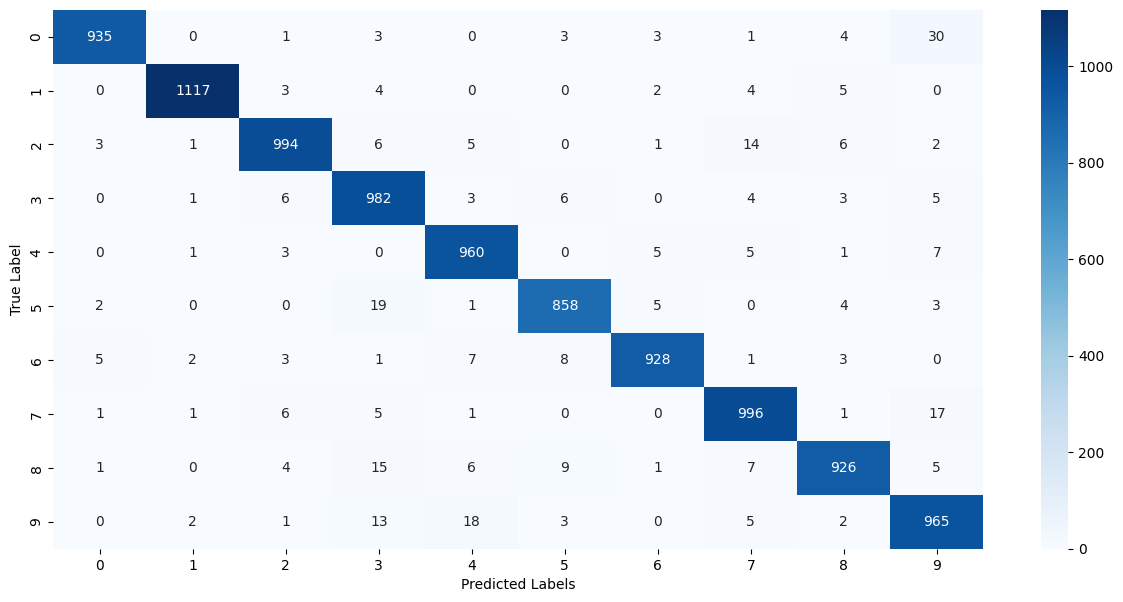

In [39]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predicted Labels")

Building the predictive system

In [75]:
input_image_path = '/content/MNIST_6_0.webp'

input_image = cv2.imread(input_image_path)

In [62]:
type(input_image)

numpy.ndarray

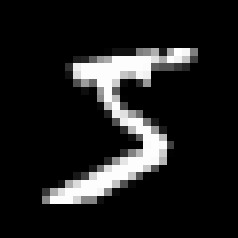

In [63]:
cv2_imshow(input_image)

In [64]:
input_image.shape

(238, 238, 3)

In [65]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [66]:
grayscale.shape

(238, 238)

In [67]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [68]:
print(input_image_resize.shape)

(28, 28)


In [69]:
cv2_imshow(input_image_resize)

In [70]:
input_image_resize = input_image_resize/255

In [71]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [72]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[3.6797745e-05 2.0060491e-02 9.8310125e-01 9.9188346e-01 8.7383238e-09
  9.9997479e-01 4.2257845e-05 2.6538920e-01 8.7404335e-03 2.1476175e-03]]


In [73]:
input_pred_label = np.argmax(input_prediction)

In [74]:
print(input_pred_label)

5


Predictive System All-in-One

Enter the path of the image to be predict/content/MNIST_6_0.webp


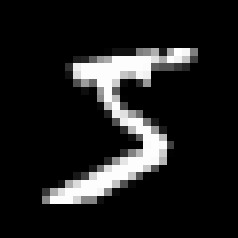

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The Handwritten digit is recognised as 5


In [77]:
input_image_path = input('Enter the path of the image to be predict')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten digit is recognised as', input_pred_label)